# Data Collection and Preparation

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data_dir = 'D:\\CODES\\Smart-Attendance-System-using-Face-Recognition-master\\people'
categories = os.listdir(data_dir)

In [3]:
categories

['Bhavesh', 'Kushagra', 'Rishabh']

In [4]:
IMG_SIZE = 224

In [5]:
def create_dataset(data_dir, categories, img_size):
    data = []
    for category in categories:
        path = os.path.join(data_dir, category)
        label = categories.index(category)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path)
            if img_array is not None:
                img_array = cv2.resize(img_array, (img_size, img_size))
                data.append([img_array, label])
    return data

data = create_dataset(data_dir, categories, IMG_SIZE)

In [6]:
import random

random.shuffle(data)
X = []
y = []

In [7]:
for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X = X / 255.0  
y = np.array(y)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")

Training samples: 74
Validation samples: 19


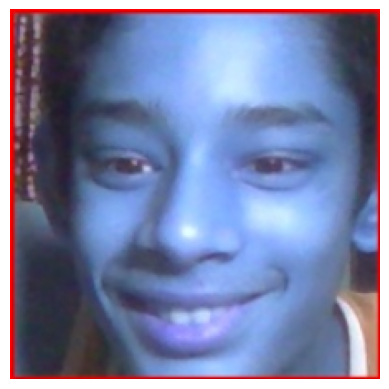

In [10]:
plt.imshow(X_train[3])
plt.axis('off')
plt.show()

# Model Training and Validation

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(categories), activation='softmax')
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)

In [15]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_val, y_val))

Epoch 1/10


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2248 - loss: 12.8970 - val_accuracy: 0.1579 - val_loss: 17.4764
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 890ms/step - accuracy: 0.3901 - loss: 9.4880 - val_accuracy: 0.1579 - val_loss: 2.9325
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3574 - loss: 1.9646 - val_accuracy: 0.5263 - val_loss: 1.0211
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 892ms/step - accuracy: 0.3689 - loss: 1.2046 - val_accuracy: 0.3158 - val_loss: 1.0571
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3789 - loss: 1.0791 - val_accuracy: 0.5263 - val_loss: 0.9930
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4139 - loss: 1.0873 - val_accuracy: 0.6842 - val_loss: 1.0036
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 880ms/step - accuracy: 0.5975 - loss: 1.0928 - val_accuracy: 0.6842 - val_loss: 0.9669
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 905ms/step - accuracy: 0.3465 - loss: 1.0676 - val_accuracy: 0.8421 - val_loss: 0.9501
Epoch 9/10
3/

In [16]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.9474 - loss: 0.5570
Validation Accuracy: 94.74%
Validation Loss: 0.5570


In [51]:
model.save('facial_recognition_model.h5')

# Testing Face Recognition with Test Images

In [53]:
model = tf.keras.models.load_model('facial_recognition_model.h5')

In [54]:
def predict_student(img_path, model, categories):
    img_array = cv2.imread(img_path)
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    prediction = model.predict(img_array)
    max_index = np.argmax(prediction[0])
    return categories[max_index], prediction[0][max_index]

In [56]:
img_1 = 'D:\\CODES\\Smart-Attendance-System-using-Face-Recognition-master\\people\\Bhavesh\\15.jpg'
img_2 = 'D:\\CODES\\Smart-Attendance-System-using-Face-Recognition-master\\people\\Rishabh\\15.jpg'

test_images = [img_1, img_2]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Image: D:\CODES\Smart-Attendance-System-using-Face-Recognition-master\people\Bhavesh\15.jpg - Predicted Student: Bhavesh, Confidence: 0.97


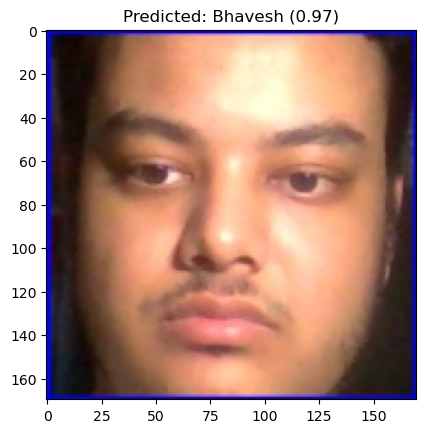

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image: D:\CODES\Smart-Attendance-System-using-Face-Recognition-master\people\Rishabh\15.jpg - Predicted Student: Rishabh, Confidence: 1.00


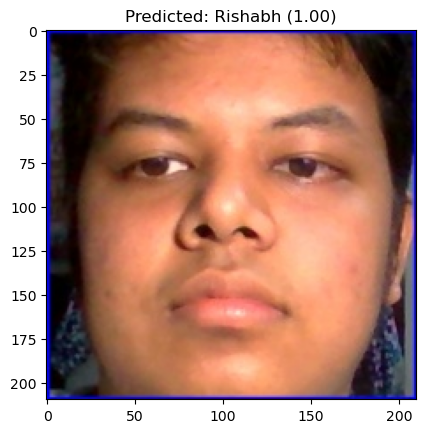

In [57]:
for img_path in test_images:
    student, confidence = predict_student(img_path, model, categories)
    print(f"Image: {img_path} - Predicted Student: {student}, Confidence: {confidence:.2f}")
    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted: {student} ({confidence:.2f})")
    plt.show()